# 경통분 hw 2

20249433 최재필

In [126]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import binom, norm

import itertools

from math import comb

## 1. 

In [83]:
p = 0.6
n = 5

### (a)

In [84]:
probs = [binom.pmf(k, n, p) for k in range(n+1)]
probs

[0.010239999999999994,
 0.07679999999999998,
 0.23040000000000002,
 0.3455999999999997,
 0.2592000000000001,
 0.07776]

<Axes: >

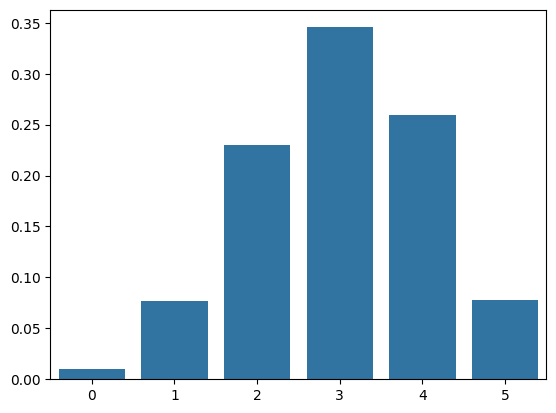

In [85]:
sns.barplot(data=np.array(probs))

### (b)

In [86]:
mean = sum(np.array(probs) * np.array(range(n+1)))
mean

2.999999999999999

In [87]:
mean = n * p
mean

3.0

In [88]:
variance = sum(np.array(probs) * (np.array(range(n+1)) - mean)**2)
variance

1.2

In [89]:
variance = n * p * (1-p)
variance

1.2000000000000002

In [90]:
# Define a function to simulate a single Bernoulli trial
def bernoulli_trial(p):
    """Returns 1 with probability p and 0 with probability 1-p."""
    return np.random.rand() < p

# Simulate n Bernoulli trials and compute the sample variance
def simulate_binomial_variance(n, p, num_simulations=10000):
    variances = []
    for _ in range(num_simulations):
        trials = [bernoulli_trial(p) for _ in range(n)]
        variances.append(np.var(trials, ddof=0))  # Population variance
    return np.mean(variances)

# Parameters for the binomial distribution
n = 10  # number of trials
p = 0.5  # probability of success

# Compute q, the probability of failure
q = 1 - p

# Simulate to compute the average variance from the simulations
simulated_variance = simulate_binomial_variance(n, p)

simulated_variance


0.22469

In [91]:
n * p * q

2.5

## 2. 

In [92]:
mu = 100
sigma = 5

In [93]:
def prob_smaller_than_b(b, mu, sigma):
    z = (b - mu) / sigma
    
    return norm.cdf(z)


In [94]:
def prob_bigger_than_b(b, mu, sigma):
    z = (b - mu) / sigma
    
    return 1 - norm.cdf(z)

In [95]:
def find_b_given_prob(prob, mu, sigma):
    z = norm.ppf(prob)
    
    return mu + z * sigma

In [96]:
def find_brange_given_prob(prob, mu, sigma):
    cumprob = 0.5 + prob / 2
    z = norm.ppf(cumprob)

    return (mu - z * sigma, mu + z * sigma)
    

### (a)

In [97]:
find_b_given_prob(0.67, mu, sigma)

102.19956582836618

In [98]:
prob_smaller_than_b(0.44, 0, 1)

0.6700314463394064

In [99]:
0.44*5+100

102.2

### (b)

In [100]:
find_b_given_prob(0.11, mu, sigma)

93.86735939981695

In [101]:
100 + (100 - find_b_given_prob(0.11, mu, sigma))

106.13264060018305

In [102]:
prob_smaller_than_b(1.23, 0, 1)

0.8906514475743081

In [103]:
find_b_given_prob(0.89, mu, sigma)

106.13264060018305

### (c)

In [104]:
a, b = find_brange_given_prob(0.966, mu, sigma)
a, b

(89.39964155128925, 110.60035844871075)

In [105]:
(b - a) / 2

10.60035844871075

### (d)

In [106]:
prob_smaller_than_b(110, mu, sigma)

0.9772498680518208

### (e)

In [107]:
prob_bigger_than_b(95, mu, sigma)

0.8413447460685429

## 3. 

In [108]:
mu = 302
sigma = 2

### (a)

In [109]:
p = prob_smaller_than_b(299, mu, sigma)
p

0.06680720126885806

In [110]:
prob_smaller_than_b(-1.5, 0, 1) 

0.06680720126885806

### (b)

In [111]:
p ** 5

1.3308110306245716e-06

## 4. 

In [120]:
x = np.array([0, 1, 2, 3])
probs = np.array([0.4, 0.3, 0.1, 0.2])

### (a)

In [121]:
expected_value = sum(x * probs)
expected_value

1.1

In [122]:
std = np.sqrt(sum(probs * (x - expected_value)**2))
std

1.1357816691600546

### (b)

In [124]:
mu = 100 * expected_value
sigma = 100 * std

In [125]:
prob_bigger_than_b(200, mu, sigma)

0.2140620447330832

### (c)

In [127]:
comb(5, 2) * 0.4 * 0.3 * 0.3**3

0.03239999999999999

### (d)

In [128]:
n = 100
p = 0.4

In [129]:
n * p

40.0

In [130]:
n * p * (1 - p)

24.0

### (e)

In [131]:
mu = 40
sigma = 24

In [132]:
prob_smaller_than_b(30, mu, sigma)

0.33846111951068963

## 5. 

### (a)

In [116]:
0.7**3 * 0.3

0.10289999999999998

### (b)

In [118]:
comb(5, 1) * 0.3 * 0.7**4

0.3601499999999999

## 6. 

### (b)

In [119]:
0.54 + 0.27 - 0.14

0.67

## 7. 